# Finanças UFRN

O cabeçalho de Daniel tá melhor que o meu então a gente via usar ele

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Working with *Values*

In this part we will show in numbers and compare the values of the works with the nature of the requests.

Just readingand showing the dataframe we are about to work with

In [30]:
works = pd.read_csv("res/obras.csv", sep=';')
work_requests = pd.read_csv("res/requisicaoobras.csv", sep=';')
#print(works.head())
#print(work_requests.head())
#pd.DataFrame(works.head())
#pd.DataFrame(work_requests.head())

#### Works Data Frame

In [29]:
pd.DataFrame(works.head())

,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14
0,493,CONSTRUÇÃO DO BLOCO H DO SETOR DE AULAS TEÓRIC...,23/03/2005 - 19/11/2005,240,FINALIZADA,6/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 829.454,21",NaN,NaN,NaN,NaN,NaN,NaN
1,521,CONSTRUÇÃO DO BLOCO A1 DO SETOR DE AULAS TEÓRI...,04/05/2005 - 30/12/2005,240,FINALIZADA,7/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 833.702,12",NaN,20/04/2005 - 20/11/2005,19O ENECIC/2005 (852005),NaN,NaN,NaN
2,848,CONSTRUÇÃO DO SETOR DE ANTIBIÓTICOS PRODUÇÃO D...,02/06/2005 - 29/01/2006,240,FINALIZADA,4/2004,03.722.669/0001-85 - CONSTRUTORA CAGEO LTDA,CONCORRÊNCIA,"R$ 1.561.230,93",TESOURO - EDUCAÇÃO (112000000),NaN,NaN,252.0,NUCLEO DE PESQUISA EM ALIMENTOS E MEDICAMENTOS,NaN
3,925,Complementação da 2ª Etapa e Realização da 3ª ...,28/01/2005 - 22/01/2006,360,FINALIZADA,2/2004,40.761.454/0001-08 - AR PROJETOS & CONSTRUÇÕE...,CONCORRÊNCIA,"R$ 814.550,74",NaN,20/12/2002 - 31/07/2007,UFRN/CONV.133/02 - HUOL (862003),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN
4,182,CONSTRUÇÃO DO DEPARTAMENTO DE FISIOTERAPIA - CCS,08/02/2006 - 02/02/2007,360,FINALIZADA,1/2005,01.694.415/0001-75 - HASTE-HABITAÇÃO E SERVIÇ...,CONCORRÊNCIA,"R$ 1.455.865,61",NaN,20/12/2004 - 30/03/2010,CONVENIO 121/2004 UFRN (732005),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN


#### Work Requests Data Frame

In [27]:
pd.DataFrame(work_requests.head())

,numero,ano,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_envio,descricao,local,observacoes,status,processo
0,1467,2018,445,CENTRO DE TECNOLOGIA,445,CENTRO DE TECNOLOGIA,27/02/2018,REPARO DO FORRO E RECUPERAÇÃO DE PEÇAS METÁLIC...,CENTRO DE TECNOLOGIA - UFRN,"RDC 01/2018 - R$ 40.984,69",CADASTRADA,NaN
1,1463,2018,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,27/02/2018,RECUPERAÇÃO ESTRUTURAL DA COBERTURA DO PRÉDIO ...,CENTRO DE TECNOLOGIA-UFRN,"RDC 01/2018 - R$ 136.974,42",PENDENTE AUTORIZAÇÃO CHEFE UNIDADE,NaN
2,1388,2018,6919,INSTITUTO DE MEDICINA TROPICAL - IMT-RN,6919,INSTITUTO DE MEDICINA TROPICAL - IMT-RN,23/02/2018,Projeto de sinalização interna e externa do IM...,"Unidade clínica do IMT-RN, ao lado do HGT.",NaN,AUTORIZADA PARA INFRA,NaN
3,1340,2018,3362,ASSESSORIA ADMINISTRATIVA (AS/CT),87,DIREÇÃO DO CENTRO DE TECNOLOGIA,23/02/2018,Conforme parecer técnico realizado pela coorde...,Complexo tecnológico de engenharia (CTEC),Construção de um abrigo para fins de destinaçã...,AUTORIZADA PARA INFRA,NaN
4,927,2018,196,DEPARTAMENTO DE FARMACIA,196,DEPARTAMENTO DE FARMACIA,08/02/2018,DIANTE DA CRIAÇÃO DA PRIMEIRA E ÚNICA EMPRESA ...,LOCAL SE TRATA DE PARTE DA ANTIGA PRAÇA DO XAR...,UNIDADE DE CUSTO CCS.,CADASTRADA,NaN


### 1. Most expensive Work
The most expensive work was on Campus do Cérebro, researching about it we found that the Campus is located in Macaiba. Because it is the construction of an environment of academic studies focused on the neurological medical area it is justified the cost of about 76 million reais, The work took 2 years to finish. 

1.1 This cell shows a Picture of the Campus do Cérebro during the construction

In [11]:
import tkinter as tk
root = tk.Tk()

imagem = tk.PhotoImage(file = "campus_cerebro.png")
w = tk.Label(root, image=imagem)
w.imagem = imagem
w.pack()

root.mainloop()

1.2 Here we use the data to find the most expensive done or in progress work

In [47]:
most_exp_work = works['valor'].max()

this = 0

print("The most expensive Work cost was:", most_exp_work)

for i,valor in enumerate(works['valor']):
    if(valor == most_exp_work):
        this = i    
        
print("Work: ", works['unidade_responsavel'][this])        
pd.DataFrame(works.iloc[this])



The most expensive Work cost was: R$    75.574.557,43

Work:  CAMPUS DO CÉREBRO


,37
id_obra,5803
descricao,"execução, pela CONTRATADA, da CONSTRUÇÃO DO CE..."
periodo,11/06/2010 - 22/12/2013
qtd_dias,720
status_obra,FINALIZADA
licitacao,10/2009
empresa,86.712.247/0001-56 - EDCON - COMÉRCIO E CONST...
modalidade,CONCORRÊNCIA
valor,"R$ 75.574.557,43"
fonte_recurso,TESOURO - EDUCAÇÃO (112000000)


### 2. Cheaper Work

In [49]:
most_cheap_work = works['valor'].min()

print("The most cheap Work was:", most_cheap_work)

this = 0

for i,valor in enumerate(works['valor']):
    if(valor == most_cheap_work):
        this = i
        
print("Work: ", works['unidade_responsavel'][this])

pd.DataFrame(works.iloc[this])

The most cheap Work was: R$             1,00
Work:  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


,421
id_obra,2878
descricao,CONSTRUÇÃO DE OBRAS CIVIS DO CENTRO DE PESQUIS...
periodo,01/01/2007 - 31/12/2007
qtd_dias,360
status_obra,FINALIZADA
licitacao,7/2006
empresa,08.288.581/0001-10 - I M COMERCIO E TERRAPLAN...
modalidade,TOMADA DE PREÇO
valor,"R$ 1,00"
fonte_recurso,UNIV.FEDERAL DO RIO GRANDE DO NORTE (250154214)


### 3. Fixing string 'Valor'

In [66]:
for index,i in enumerate(works['valor']):
    i = i.replace(" ", "")
    i = i.replace("R$", "")
    i = i.replace(".","")
    i = i.replace(",", "")
    i = int(i)
    works['valor'][index] = i


AttributeError: 'int' object has no attribute 'replace'

In [67]:
works_cost_mean = works['valor'].mean()
print("The Works coust mean was:", works_cost_mean)

The Works coust mean was: 91264780.6882494


### 4. Valor

Tô quase desistindo desse aqui

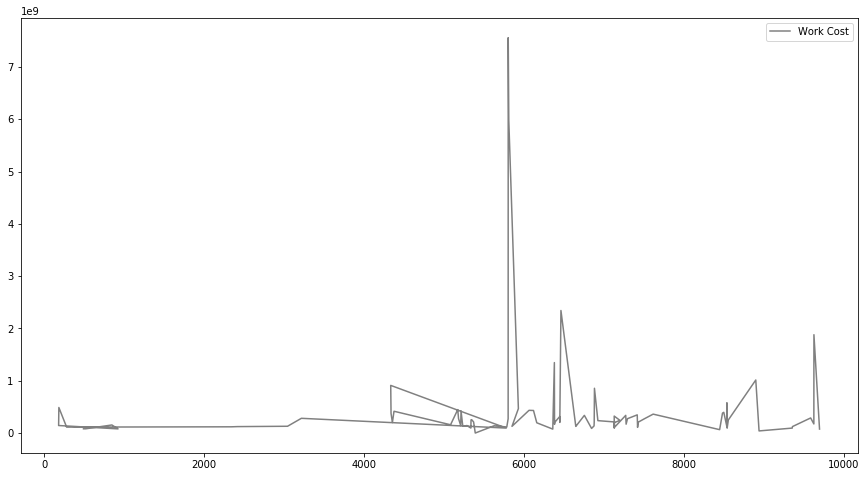

In [63]:
fig = plt.figure(figsize=(15,8))
plt.plot( works['id_obra'][:100],works['valor'][:100], c='gray', label='Work Cost')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper right')
plt.title('')
plt.show()

In [84]:
works.plot(kind='scatter',x='valor', y='periodo')
plt.show()

### 5. Status 

In [76]:
status = work_requests.copy()
sta = work_requests['status'].value_counts()

print("The requests Status:")
pd.DataFrame(sta)

The requests Status:


,status
ENVIADA_PROJETO,2188
ATENDIDA,1351
FINALIZADA_ATENDIMENTO,800
ARQUIVADA,703
ENVIADA_ORCAMENTO,487
ENVIADA_LICITACAO,231
NEGADA,180
AUTORIZADA PELO CHEFE DA UNIDADE,151
ESTORNADA,113
CADASTRADA,109


Grafico está com um erro

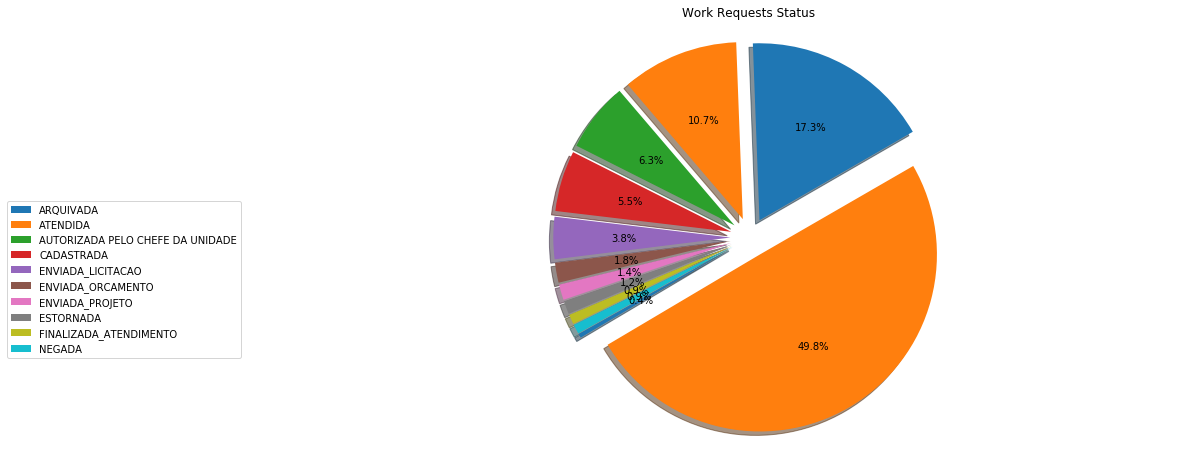

In [98]:
sizes = [sta.sort_values(ascending=False).iloc[0], sta.sort_values(ascending=False).iloc[1], 
         sta.sort_values(ascending=False).iloc[2], sta.sort_values(ascending=False).iloc[3], 
         sta.sort_values(ascending=False).iloc[4], sta.sort_values(ascending=False).iloc[5], 
         sta.sort_values(ascending=False).iloc[6], sta.sort_values(ascending=False).iloc[7],
         sta.sort_values(ascending=False).iloc[8], sta.sort_values(ascending=False).iloc[9],
         sta.sort_values(ascending=False).iloc[10], sta.sort_values(ascending=False).iloc[0:10].sum()]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
labels = sta.sort_values(ascending=False).index[0:10].sort_values()
fig = plt.figure(figsize=(15,8))
plt.pie(sizes, explode=explode, autopct='%1.1f%%',shadow=True, startangle=30, radius=0.9)
plt.axis('equal')
plt.legend(loc='best',labels=labels, bbox_to_anchor=(-0.1,0.6))
plt.title("Work Requests Status")
plt.show()